# Visualization of K-Means applied on raw pixels

In [360]:
import cv2 as cv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [361]:
import src
from src.data_generation.utils import downsample_img
from src.hierarchical_properties.k_means import k_means_on_img
import importlib

importlib.reload(src.hierarchical_properties.k_means)
from src.hierarchical_properties.k_means import k_means_on_img

In [362]:
# Constants
img_path = r"C:\Users\lucam\OneDrive\Documenti\KTH\2nd_year\P1\Adv DL\Project\DD2412project\data\img_trial\abc.png"

full_size = 448
patch_size = 14

# K-Means
k = 8
max_iter = 100
epsilon = 0.2
attempts = 10
normalize = True

weight_original_img = 0.4
weight_colored_patch = 0.4
gamma = 0

In [363]:
img = cv.imread(img_path)

img = downsample_img(img, full_size, full_size, False)

In [364]:
#seg_img = k_means_on_img(img, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

## Extraction of the patch from the original image

In [365]:
patch = downsample_img(img, patch_size, patch_size, False)

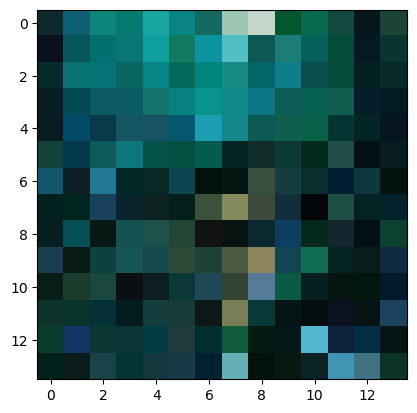

In [366]:
plt.imshow(patch)
plt.show()

### Apply K-Means on the patch

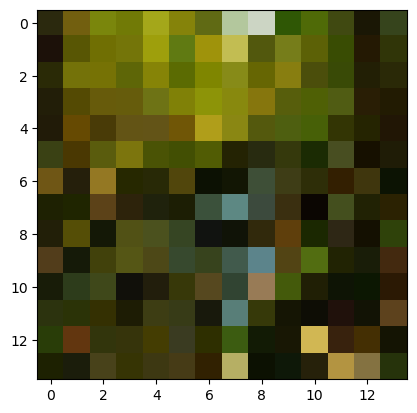

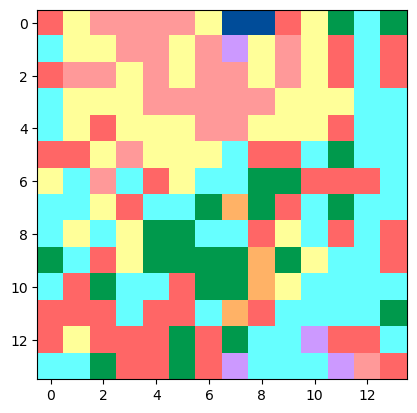

In [367]:
seg_patch = k_means_on_img(patch, k=k, max_iter=max_iter, epsilon=epsilon, attempts=attempts, normalize=normalize, plot=True)

In [368]:
seg_patch

array([[[255, 102, 102],
        [255, 255, 153],
        [255, 153, 153],
        [255, 153, 153],
        [255, 153, 153],
        [255, 153, 153],
        [255, 255, 153],
        [  0,  76, 153],
        [  0,  76, 153],
        [255, 102, 102],
        [255, 255, 153],
        [  0, 153,  76],
        [102, 255, 255],
        [  0, 153,  76]],

       [[102, 255, 255],
        [255, 255, 153],
        [255, 255, 153],
        [255, 153, 153],
        [255, 153, 153],
        [255, 255, 153],
        [255, 153, 153],
        [204, 153, 255],
        [255, 255, 153],
        [255, 153, 153],
        [255, 255, 153],
        [255, 102, 102],
        [102, 255, 255],
        [255, 102, 102]],

       [[255, 102, 102],
        [255, 153, 153],
        [255, 153, 153],
        [255, 255, 153],
        [255, 153, 153],
        [255, 255, 153],
        [255, 153, 153],
        [255, 153, 153],
        [255, 255, 153],
        [255, 153, 153],
        [255, 255, 153],
        [255, 102, 10

## Bilinear Interpolation

In [369]:
seg_full = downsample_img(seg_patch, full_size, full_size, False)

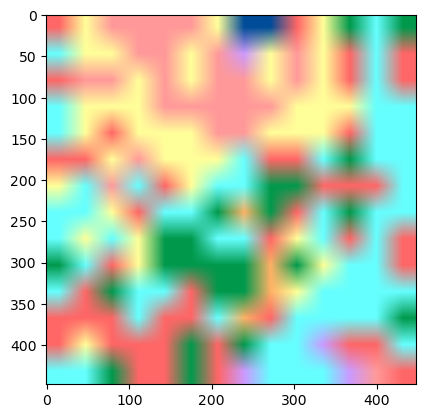

In [370]:
plt.imshow(seg_full)
plt.show()

In [371]:
# Convert the original image as grayscale image to put it in the background
# to be able to put the patch (the output of Kmeans) over it in a transparent
# way.
# Single channel grayscale image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Repeat the grayscale image along all the 3 channels
stacked_img = np.stack((img_gray, ) * 3, axis=-1)

In [372]:
final_img = cv.addWeighted(stacked_img, weight_original_img, seg_full, weight_colored_patch, gamma)

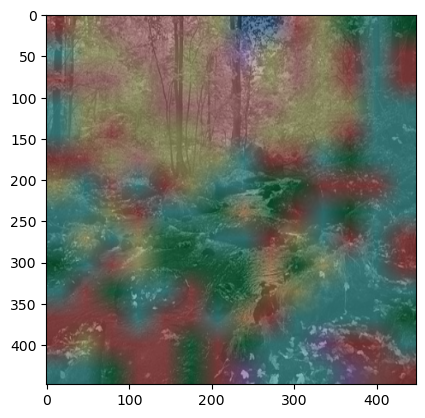

In [373]:
plt.imshow(final_img)
plt.show()

## Nearest Neighbors Interpolation

In [374]:
seg_full_nearest_neighbor_interp = downsample_img(
    seg_patch, full_size, full_size, False,
    interpolation_method=cv.INTER_NEAREST)

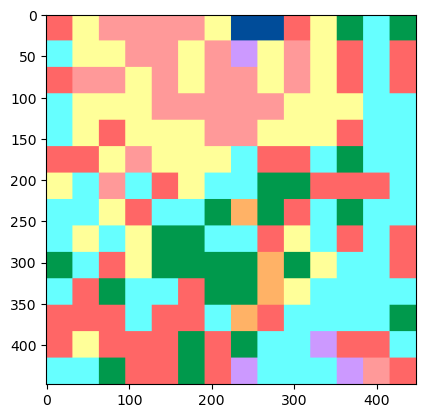

In [375]:
plt.imshow(seg_full_nearest_neighbor_interp)
plt.show()

In [376]:
seg_full_nearest_neighbor_interp

array([[[255, 102, 102],
        [255, 102, 102],
        [255, 102, 102],
        ...,
        [  0, 153,  76],
        [  0, 153,  76],
        [  0, 153,  76]],

       [[255, 102, 102],
        [255, 102, 102],
        [255, 102, 102],
        ...,
        [  0, 153,  76],
        [  0, 153,  76],
        [  0, 153,  76]],

       [[255, 102, 102],
        [255, 102, 102],
        [255, 102, 102],
        ...,
        [  0, 153,  76],
        [  0, 153,  76],
        [  0, 153,  76]],

       ...,

       [[102, 255, 255],
        [102, 255, 255],
        [102, 255, 255],
        ...,
        [255, 102, 102],
        [255, 102, 102],
        [255, 102, 102]],

       [[102, 255, 255],
        [102, 255, 255],
        [102, 255, 255],
        ...,
        [255, 102, 102],
        [255, 102, 102],
        [255, 102, 102]],

       [[102, 255, 255],
        [102, 255, 255],
        [102, 255, 255],
        ...,
        [255, 102, 102],
        [255, 102, 102],
        [255, 102, 102]]

In [377]:
nearest_neighbor_interp_final_img = cv.addWeighted(
    stacked_img, weight_original_img,
    seg_full_nearest_neighbor_interp,
    weight_colored_patch, gamma)

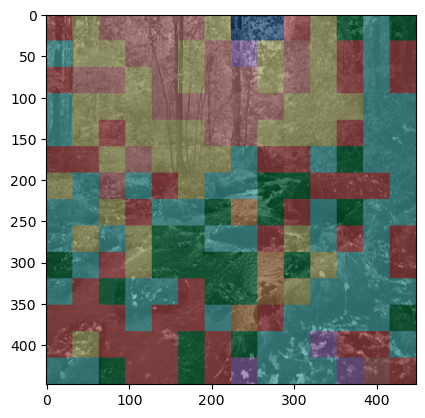

In [378]:
plt.imshow(nearest_neighbor_interp_final_img)
plt.show()